#K means --Unsupervised Algo
#1.Assume no of clusters K 
#2. Assume K centroid
#3. Compute distance between centroid and observations,Equildean distance 
#4. Assign observation to the centroid group based min distance 
#5.Update centroid,taking mean of all the observations
#6. Stop the process till subsequent centroids are equal / till algorithm converges 


In [8]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import StandardScaler


In [5]:
df=pd.read_csv("income.csv")

In [6]:
df


,Name,Age,Income
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


Text(0, 0.5, 'Income')

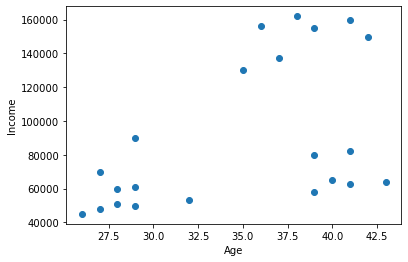

In [7]:
plt.scatter(df.Age,df['Income'])
plt.xlabel('Age')
plt.ylabel('Income')

In [9]:
df_new=df[['Age','Income']]

In [12]:
scaler1=StandardScaler()
df_scaled=scaler1.fit_transform(df_new)

In [13]:
df_scaled

array([[-1.35605536, -0.48068427],
       [-1.00915747, -0.01015907],
       [-1.00915747, -0.69242061],
       [-1.18260641, -0.71594687],
       [ 1.24567876,  1.40141653],
       [ 0.72533193,  1.51904783],
       [ 1.07222982,  1.63667914],
       [ 0.55188299,  1.68373166],
       [ 0.20498511,  1.54257409],
       [ 0.03153617,  0.93089133],
       [ 0.37843405,  1.09557515],
       [-1.5295043 , -1.06884077],
       [-1.35605536, -0.99826199],
       [-1.18260641, -0.92768321],
       [-1.00915747, -0.9629726 ],
       [-0.48881065, -0.88063069],
       [ 0.89878087, -0.59831557],
       [ 1.07222982, -0.64536809],
       [ 1.4191277 , -0.62184183],
       [ 0.72533193, -0.24542167],
       [ 1.07222982, -0.19836915],
       [ 0.72533193, -0.76299939]])

In [15]:
km=KMeans(n_clusters=3)
y_pred=km.fit_predict(df_scaled)
y_pred

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [16]:
df['cluster']=y_pred

In [17]:
df.head()

,Name,Age,Income,cluster
0,Rob,27,70000,1
1,Michael,29,90000,1
2,Mohan,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,0


In [18]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]

No handles with labels found to put in legend.


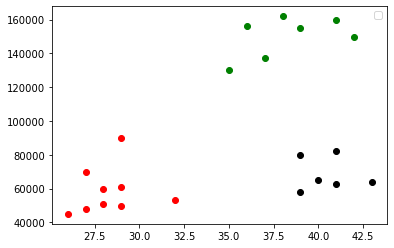

In [19]:
plt.scatter(df1.Age,df1.Income,color='green')
plt.scatter(df2.Age,df2.Income,color='red')
plt.scatter(df3.Age,df3.Income,color='black')
plt.legend()

In [ ]:
#Techniques to Measure quality of clusters
#1. Inertia
#2.Silhoutte Score
#Good model Inertia -- Low and Low no of clusters 

## Inertia --distance each datapoint and centroid(square and sum it )
## Elbow point /Plot

### Elbow Plot helps decide value of K 

In [20]:
sse=[]
k_rng=range(1,10) 
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(df_scaled)
    sse.append(km.inertia_)

C:\Users\Leena Shibu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


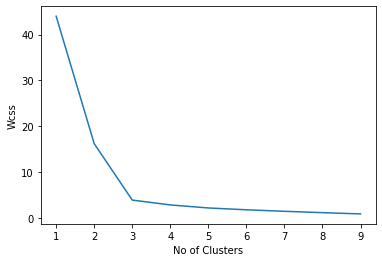

In [22]:
plt.xlabel('No of Clusters')
plt.ylabel('Wcss') #Wcss--Within cluster sum of square
plt.plot(k_rng,sse)

## Silhoutte score 
## pip install yellowbrick 

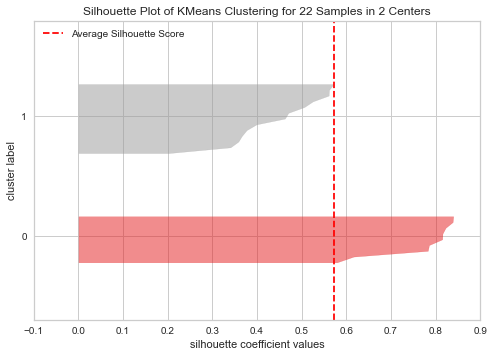

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 22 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [25]:
from yellowbrick.cluster import SilhouetteVisualizer

clust_mod=KMeans(n_clusters=2,random_state=0)
viz=SilhouetteVisualizer(clust_mod,color='yellowbrick')
viz.fit(df_scaled)
viz.show()

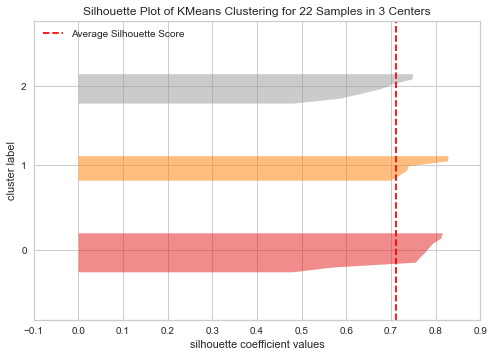

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 22 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [26]:
from yellowbrick.cluster import SilhouetteVisualizer

clust_mod=KMeans(n_clusters=3,random_state=0)
viz=SilhouetteVisualizer(clust_mod,color='yellowbrick')
viz.fit(df_scaled)
viz.show()

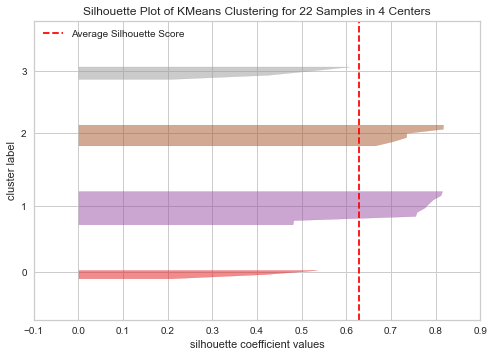

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 22 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [27]:
from yellowbrick.cluster import SilhouetteVisualizer

clust_mod=KMeans(n_clusters=4,random_state=0)
viz=SilhouetteVisualizer(clust_mod,color='yellowbrick')
viz.fit(df_scaled)
viz.show()

In [33]:
from sklearn.metrics import silhouette_score
c1=[2,3,4,5,6,7]
for k in c1:
    clust_mod=KMeans(n_clusters=k,random_state=0)
    clust_mod.fit(df_scaled)
    print(k,silhouette_score(df_scaled,clust_mod.labels_))

2 0.5723194612553445
3 0.7119890290065082
4 0.6289796936723044
5 0.4747457655987608
6 0.46210543839933194
7 0.4327737772148998


In [ ]:
Paypal  ---customers payment --Banks--Average spenders,careful,aggressive spenders 

retails--Loyalty customers
Netflix--
Kmeans --widely used Segmentation
AirBNB--Kmeans combination--segmentation
  mobile party 
Adv Kmeans

1.Easy understand 
2.Number data 
3. good results cluster spherical 

Disadv--1. iterative algorithm

        2.computationally intensive 
        3. K value --observe cluster formation --inertia(Elbow Plot,Silhouette score)
        
        2.Hierarchical Clustering 

